In [14]:
!pip install fredapi


In [ ]:

from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import datetime

fred = Fred(api_key=os.getenv("FRED_API_KEY"))


start = datetime.datetime(1967, 6, 1)
end   = datetime.datetime(2025, 1, 1)


In [61]:
# Fetch some key series from FRED
fred_series = {
    't10y2y':'T10Y2Y',                              #https://fred.stlouisfed.org/series/T10Y2Y
    't10y3m': 'T10Y3M',                            # 10y - 3m Treasury spread (%)
    'unemployment_rate': 'UNRATE',                 # Unemployment rate (%)
    'federal_funds_rate': 'FEDFUNDS',               # Fed Funds Rate (%)
    'consumer_sentiment': 'UMCSENT',                # Consumer Sentiment Index (Univ. Michigan)
    'labor_force_participation_rate': 'CIVPART',    # Labor Force Participation Rate
    'real_gross_domestic_income_pct_change': 'A261RL1Q225SBEA',  # Real GDI % Change
    'real_avg_of_gdp_and_gdi_pct_change': 'PB0000091Q225SBEA',  # Avg of GDP and GDI % Change
    'industrial_production_index': 'INDPRO',        # Industrial Production Index (2017=100)
    'nber_recession_indicator': 'USREC',            # NBER recession indicator (0/1)
    'recession_probability': 'RECPROUSM156N'
}

In [62]:
series_q = []
for nice, code in fred_series.items():
    print(f"fetching {nice} …")
    s = fred.get_series(code)

    if nice == "nber_recession_indicator":
        s_q = s.resample("Q").max()       # flag: any '1' in the quarter → 1
    else:
        s_q = s.resample("Q").last()      # economic variables: last obs in quarter

    series_q.append(s_q.rename(nice))

# merge all quarter-end series side-by-side
data = pd.concat(series_q, axis=1)

# keep analysis window and ffill remaining gaps
data = data.loc[start:end].ffill()


fetching t10y2y …


<ipython-input-62-1cdd217060a8>:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  s_q = s.resample("Q").last()      # economic variables: last obs in quarter


fetching t10y3m …
fetching unemployment_rate …
fetching federal_funds_rate …
fetching consumer_sentiment …
fetching labor_force_participation_rate …
fetching real_gross_domestic_income_pct_change …
fetching real_avg_of_gdp_and_gdi_pct_change …
fetching industrial_production_index …
fetching nber_recession_indicator …


<ipython-input-62-1cdd217060a8>:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  s_q = s.resample("Q").max()       # flag: any '1' in the quarter → 1


fetching recession_probability …


In [63]:
data.head()

,t10y2y,t10y3m,unemployment_rate,federal_funds_rate,consumer_sentiment,labor_force_participation_rate,real_gross_domestic_income_pct_change,real_avg_of_gdp_and_gdi_pct_change,industrial_production_index,nber_recession_indicator,recession_probability
1967-06-30,NaN,NaN,3.9,3.98,95.9,59.6,2.2,1.2,34.5863,0.0,0.72
1967-09-30,NaN,NaN,3.8,3.99,97.0,59.7,4.3,4.1,35.1116,0.0,0.38
1967-12-31,NaN,NaN,3.8,4.51,92.9,59.9,4.1,3.6,36.2905,0.0,0.04
1968-03-31,NaN,NaN,3.7,5.05,97.2,59.6,6.1,7.2,36.4949,0.0,0.02
1968-06-30,NaN,NaN,3.7,6.07,92.4,60.0,6.2,6.5,37.0934,0.0,0.02


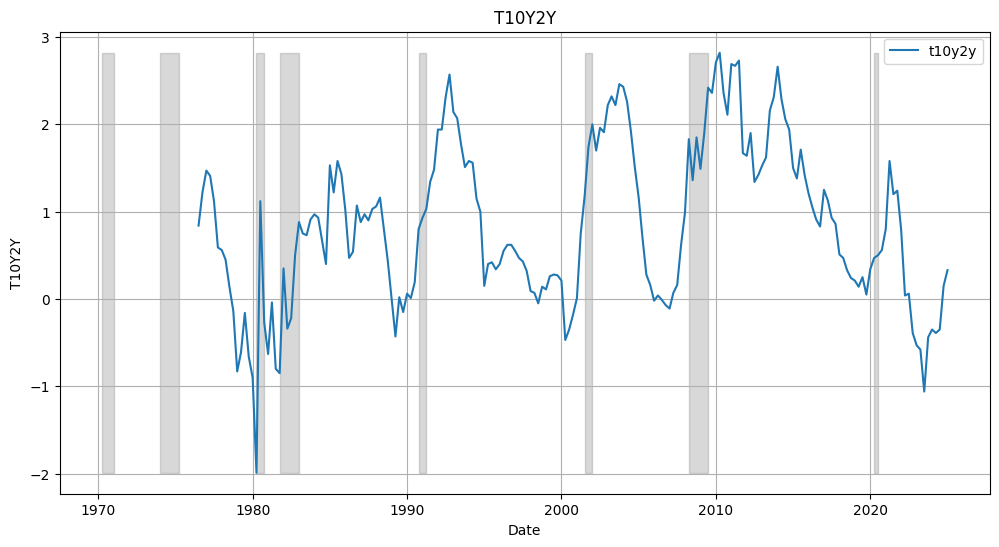

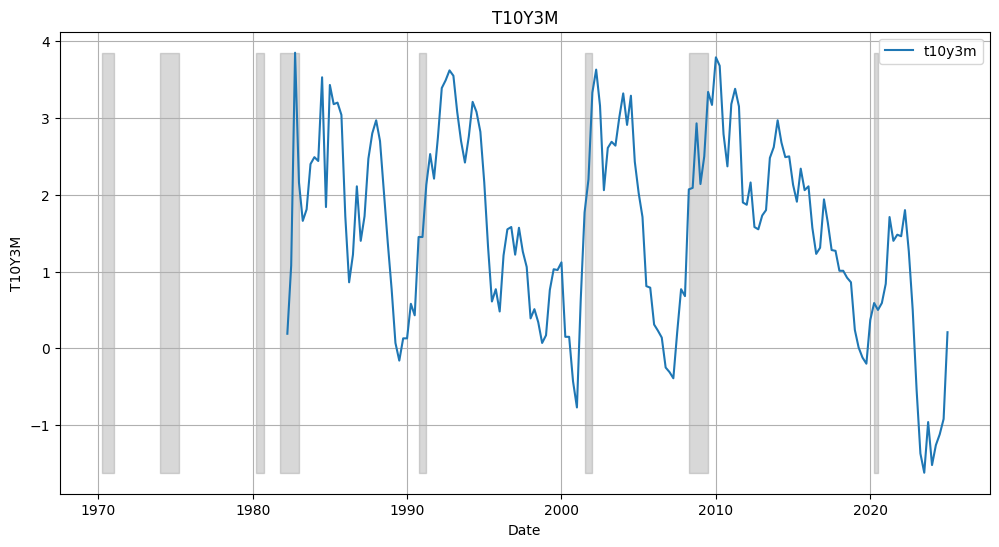

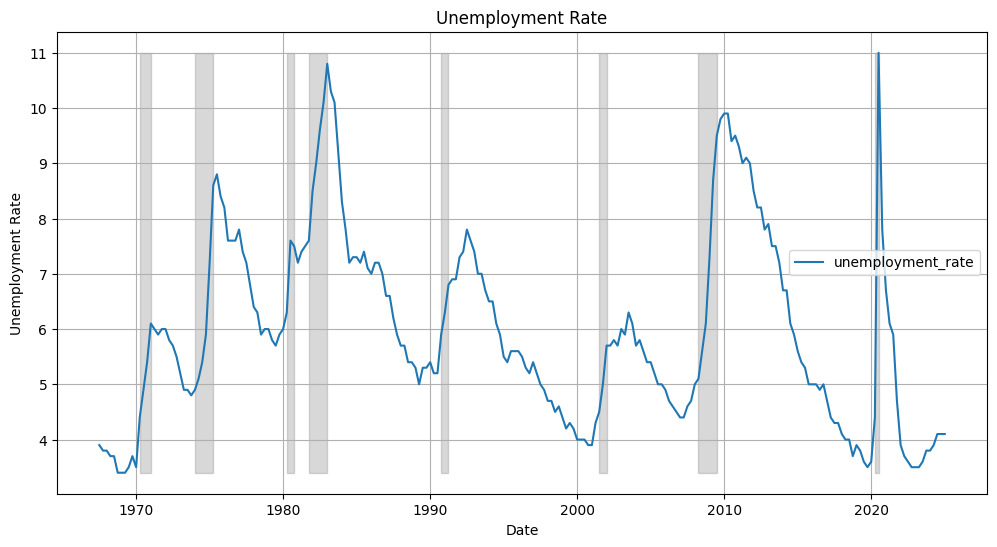

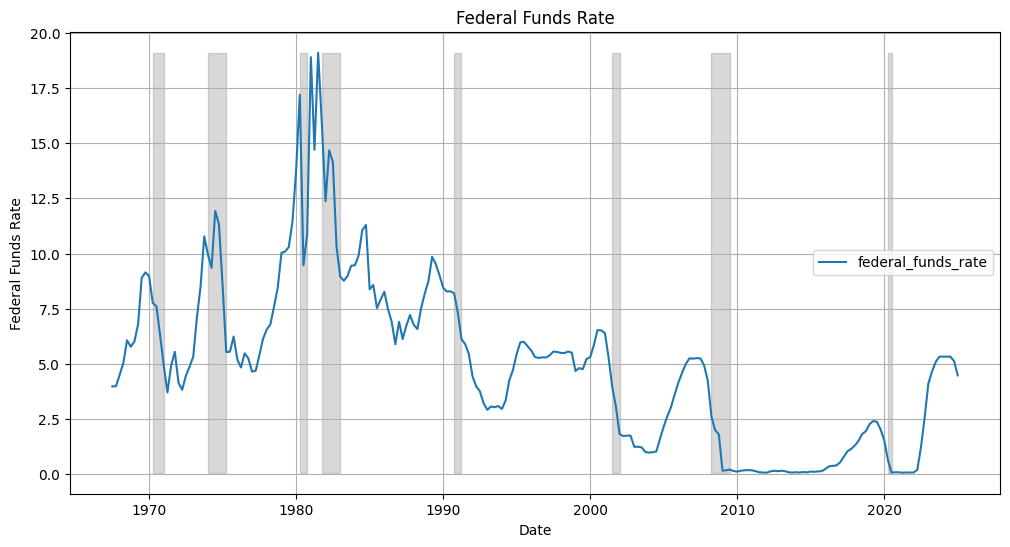

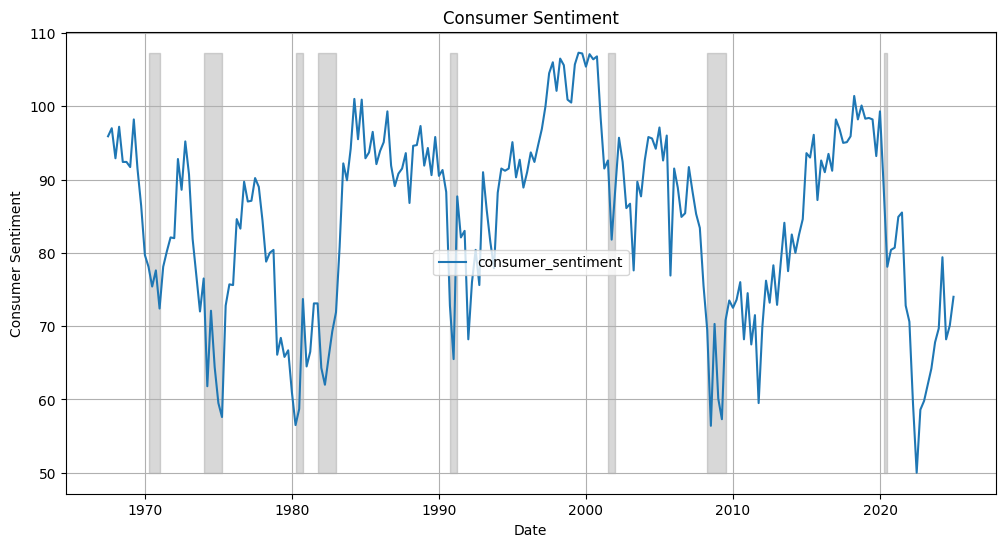

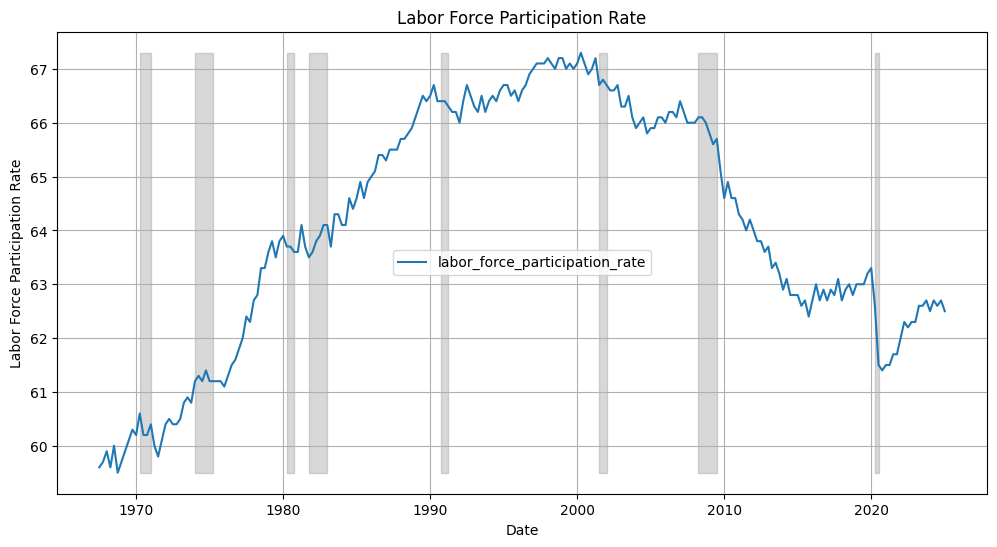

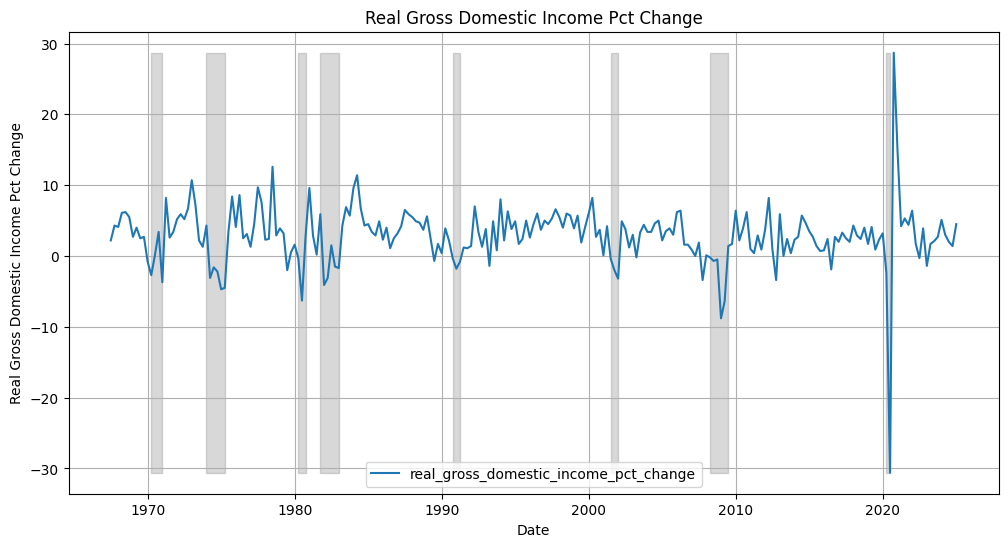

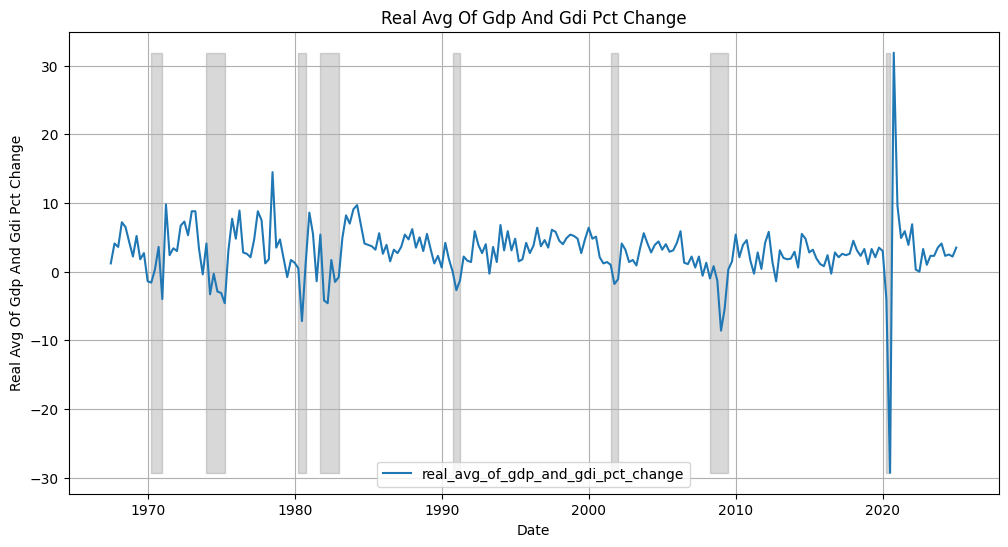

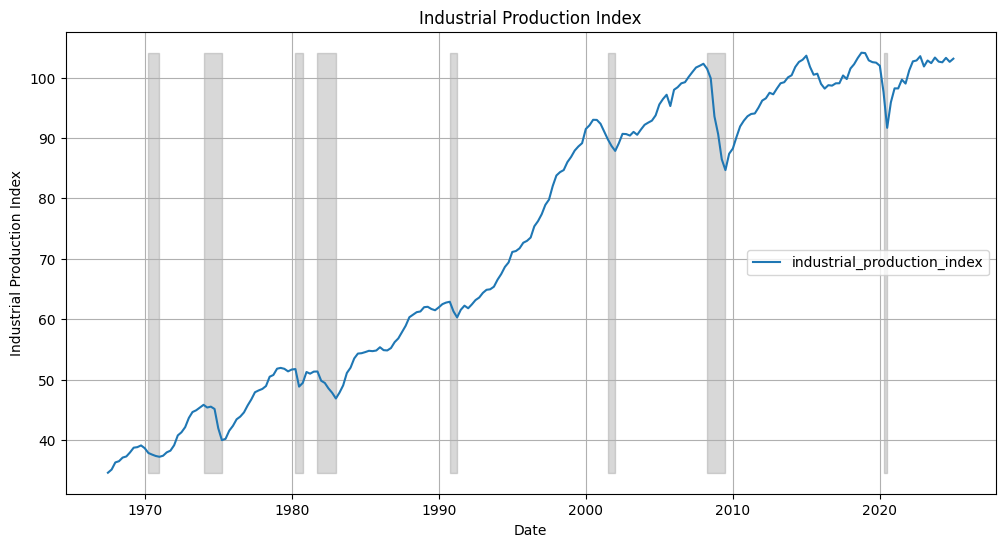

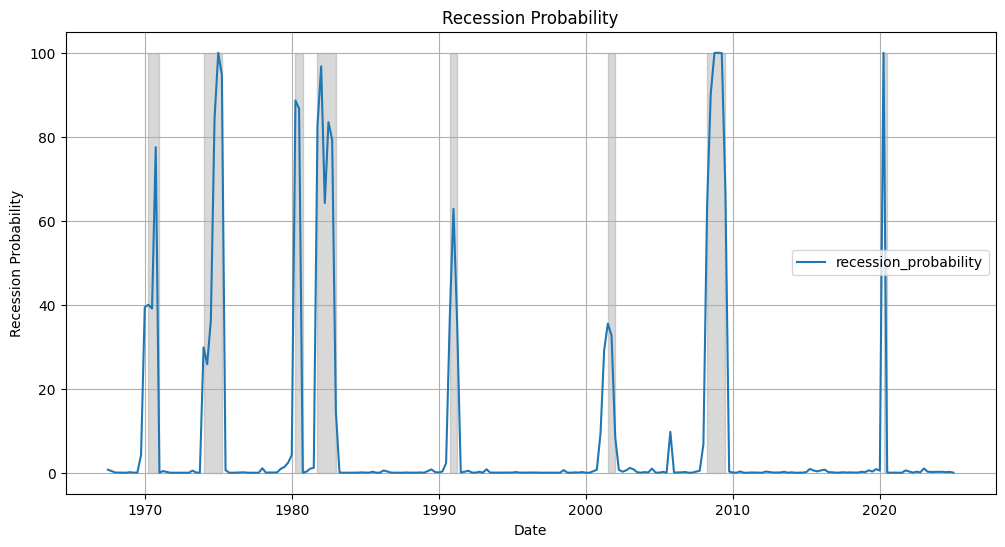

In [64]:
for col in data.columns:
    if col == "nber_recession_indicator":
        continue

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[col], label=col)

    # grey shade where recession flag = 1
    rec_flag = data["nber_recession_indicator"]
    plt.fill_between(
        data.index,
        data[col].min(), data[col].max(),
        where=rec_flag == 1,
        color="gray", alpha=0.3
    )

    plt.title(col.replace("_", " ").title())
    plt.xlabel("Date")
    plt.ylabel(col.replace("_", " ").title())
    plt.grid(True)
    plt.legend()
    plt.show()